<a href="https://colab.research.google.com/github/eldivohno/Tugas2AI/blob/main/Tuga-Fuzzy-Logic_MOH.%20ELDIVO%20ALSYAWAL%20OTOLUWA_1102223205_EL-46-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install networkx
!pip install scikit-fuzzy

In [35]:
# TUGAS FUZZY LOGIC
# MOH. ELDIVO ASLYAWAL OTOLUWA
# 1102223205
# EL-46-02
# FUZZY LOGIC FUEL USAGE FROM AERAGE SPEED AND DISTANCE OF A VEHICLE

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

speed = ctrl.Antecedent(np.arange(0, 115, 1), 'speed')
distance = ctrl.Antecedent(np.arange(0, 50, 1), 'distance')
fuel = ctrl.Consequent(np.arange(0, 100, 1), 'fuel')

speed['low'] = fuzz.trapmf(speed.universe, [0, 0, 15, 30])
speed['mid-low'] = fuzz.trapmf(speed.universe, [15, 30, 45, 60])
speed['mid-high'] = fuzz.trapmf(speed.universe, [45, 60, 75, 90])
speed['high'] = fuzz.trapmf(speed.universe, [75, 90, 105, 105])

distance['near'] = fuzz.trapmf(distance.universe, [0, 0, 5, 15])
distance['mid'] = fuzz.trapmf(distance.universe, [5, 15, 25, 35])
distance['far'] = fuzz.trapmf(distance.universe, [25, 35, 50, 50])

fuel['low'] = fuzz.trapmf(fuel.universe, [0, 0, 20, 40])
fuel['medium'] = fuzz.trapmf(fuel.universe, [20, 40, 60, 80])
fuel['high'] = fuzz.trapmf(fuel.universe, [60, 80, 100, 100])


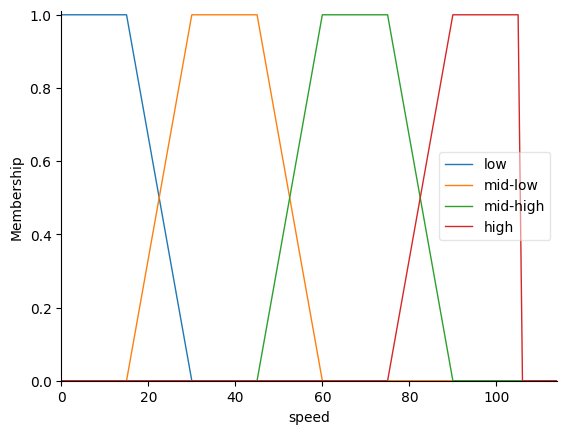

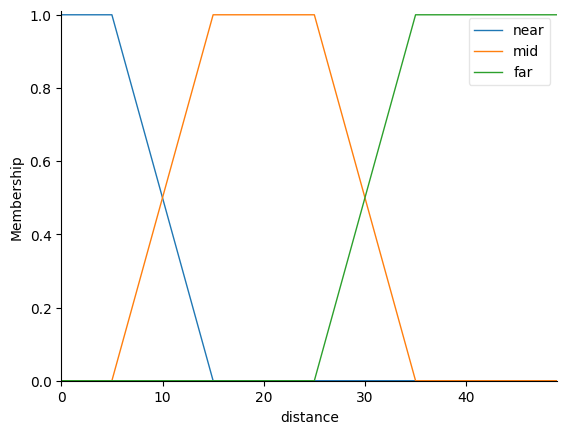

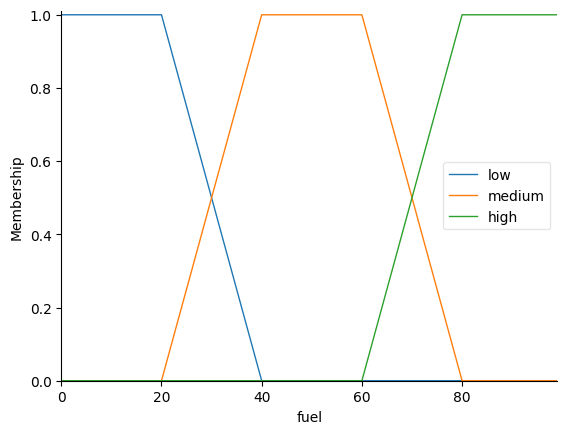

In [36]:
speed.view()
distance.view()
fuel.view()

In [39]:
rule1 = ctrl.Rule(speed['low'] & distance['near'], fuel['low'])
rule2 = ctrl.Rule(speed['low'] & distance['mid'], fuel['low'])
rule3 = ctrl.Rule(speed['low'] & distance['far'], fuel['medium'])
rule4 = ctrl.Rule(speed['mid-low'] & distance['near'], fuel['low'])
rule5 = ctrl.Rule(speed['mid-low'] & distance['mid'], fuel['medium'])
rule6 = ctrl.Rule(speed['mid-low'] & distance['far'], fuel['medium'])
rule7 = ctrl.Rule(speed['mid-high'] & distance['near'], fuel['medium'])
rule8 = ctrl.Rule(speed['mid-high'] & distance['mid'], fuel['medium'])
rule9 = ctrl.Rule(speed['mid-high'] & distance['far'], fuel['high'])
rule10 = ctrl.Rule(speed['high'] & distance['near'], fuel['medium'])
rule11 = ctrl.Rule(speed['high'] & distance['near'], fuel['high'])
rule12 = ctrl.Rule(speed['high'] & distance['far'], fuel['high'])


In [47]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
consumption_simulator = ctrl.ControlSystemSimulation(consumption_ctrl)

consumption_simulator.input['speed'] = 58
consumption_simulator.input['distance'] = 28

consumption_simulator.compute()
print("Output :", consumption_simulator.output['fuel'])


Output : 56.452319587629006


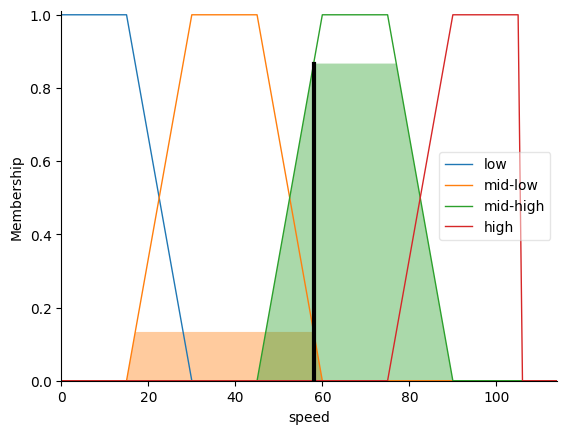

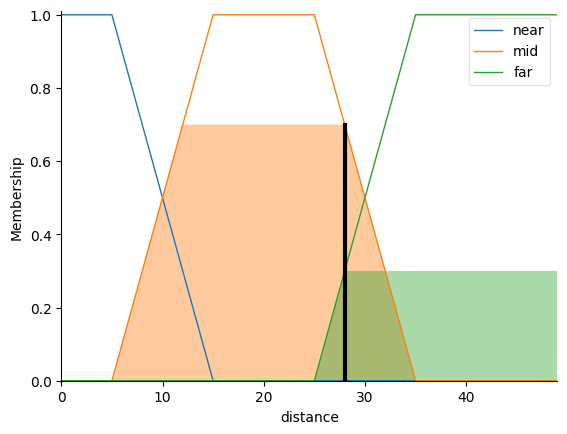

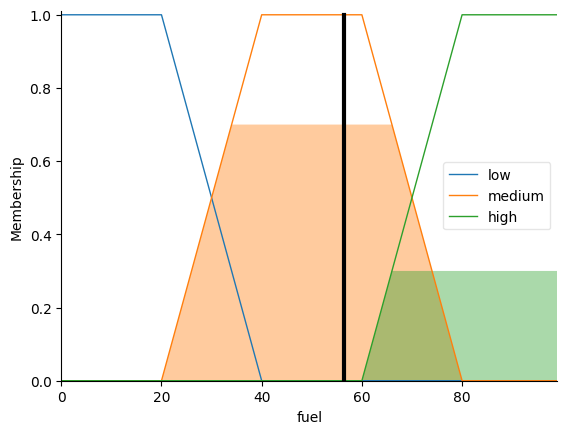

In [48]:
speed.view(sim=consumption_simulator)
distance.view(sim=consumption_simulator)
fuel.view(sim=consumption_simulator)
